In [1]:
from geometry_functions import CA_coords, get_score, get_all_pairs, general_get_contacts
import matplotlib.pyplot as plt

Pairs of chains to compute distances:
A B lengths: 24 122
A C lengths: 24 118
B A lengths: 122 24
C A lengths: 118 24


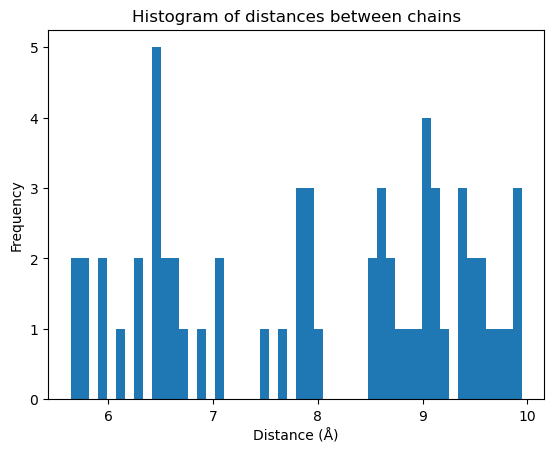

Average score: 0.45889681511379377
Number of contacts: 57
Total score: 26.157118461486245
Contacts index: {'A': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}, 'B': {33, 34, 37, 43, 44, 45, 46, 47, 48, 22, 23, 25, 26, 27, 28, 29, 30, 31}, 'C': {9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29}}


In [ ]:
pdb_file = 'input_pdbs/8.pdb'
omit_chain_pairs = [('B', 'C')]
pairs = get_all_pairs(pdb_file, omit_chain_pairs)
distances, contacts_index, n_contacts = general_get_contacts(pairs)

plt.hist(distances, bins=50)
plt.xlabel('Distance (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of distances between chains')
plt.show()

score = get_score(distances)
print('Average score:', score)
print('Number of contacts:', n_contacts)
print('Total score:', score * n_contacts)
print('Contacts index:', contacts_index)